In [12]:
# Save the cleaned and feature-engineered DataFrame to a CSV file
processed_file_name = 'telco_churn_processed_for_looker.csv'
df.to_csv(processed_file_name, index=False)
print(f"\nProcessed data saved to {processed_file_name}")

# You can download this file directly from Colab to your local machine:
from google.colab import files
files.download(processed_file_name)
print(f"Downloaded '{processed_file_name}' to your local machine.")



Processed data saved to telco_churn_processed_for_looker.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded 'telco_churn_processed_for_looker.csv' to your local machine.


In [11]:
# Convert 'Churn' target variable to numerical (No=0, Yes=1)
df['Churn_Numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Prepare data for modeling
# Select features (X) and target (y)
# Exclude original 'Churn' and other non-feature columns
features = df.drop(['Churn', 'Churn_Numeric'], axis=1)
target = df['Churn_Numeric']

# Handle categorical variables using one-hot encoding
# This converts categorical text into numerical columns for the model
X = pd.get_dummies(features, drop_first=True) # drop_first avoids multicollinearity
y = target

print("Features for modeling (first 5 rows):")
print(X.head())
print("\nTarget variable (first 5 values):")
print(y.head())
print("\nShape of feature matrix X:", X.shape)
print("Shape of target vector y:", y.shape)

# Split data into training and testing sets
# train_size=0.8 means 80% for training, 20% for testing
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
# max_iter: number of iterations for the solver to converge
# solver='liblinear': good for small datasets and binary classification
# random_state: ensures reproducibility of results
model.fit(X_train, y_train)
print("\nLogistic Regression model trained successfully!")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("  True Positives (top-left): Correctly predicted non-churners")
print("  False Positives (top-right): Predicted churn but customer didn't churn (Type I error)")
print("  False Negatives (bottom-left): Predicted non-churn but customer churned (Type II error)")
print("  True Negatives (bottom-right): Correctly predicted churners")

# Optional: Display coefficients (feature importance)
# This shows which features the model considers important.
# Higher absolute value indicates more importance.
# Positive coefficient for 'Yes' churn suggests the feature increases churn likelihood.
print("\nModel Coefficients (Feature Importance):")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
print(coefficients.head(10))
print("Insight: Features with larger absolute coefficients have a stronger impact on churn prediction.")

Features for modeling (first 5 rows):
   tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0       1           29.85         29.85                  False   
1      34           56.95       1889.50                  False   
2       2           53.85        108.15                  False   
3      45           42.30       1840.75                  False   
4       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0                  False                 

Overall Churn Rate: 26.54%



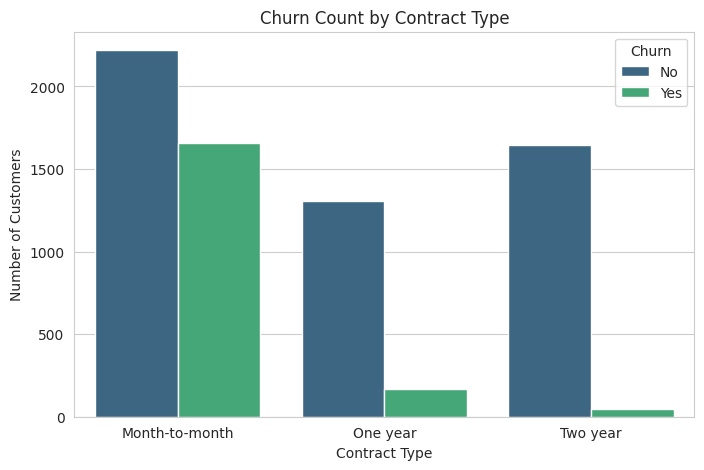

Insight: Month-to-month contracts have significantly higher churn.


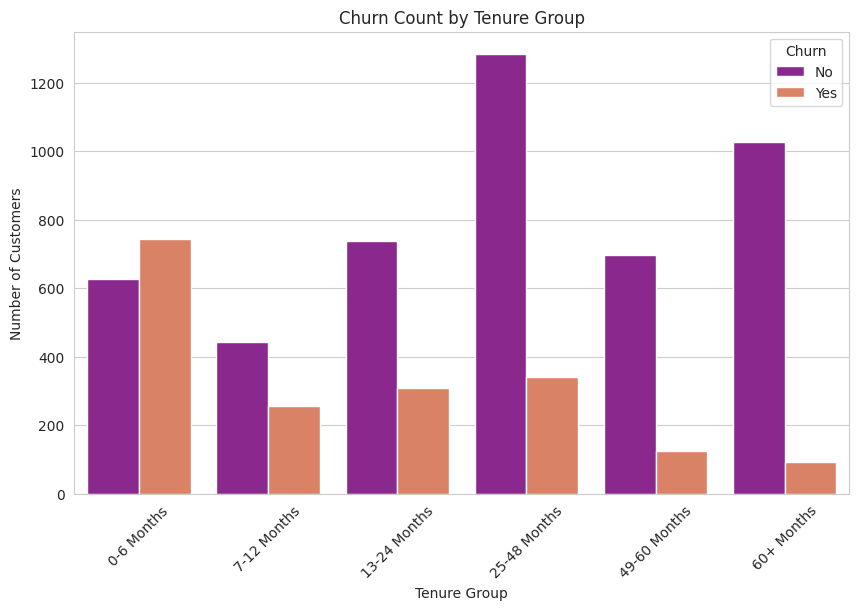

Insight: Churn is high in early tenure groups, especially 0-6 months.


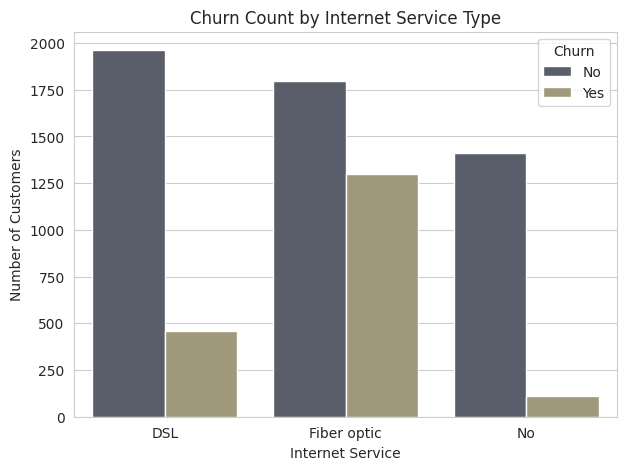

Insight: Fiber optic internet customers show higher churn compared to DSL.


/tmp/ipython-input-10-127718809.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='muted')


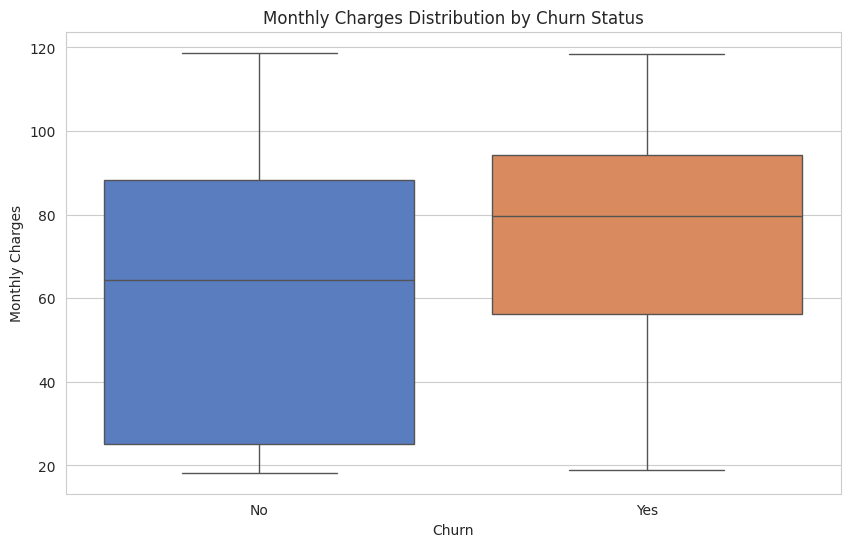

Insight: Churned customers tend to have higher monthly charges on average.


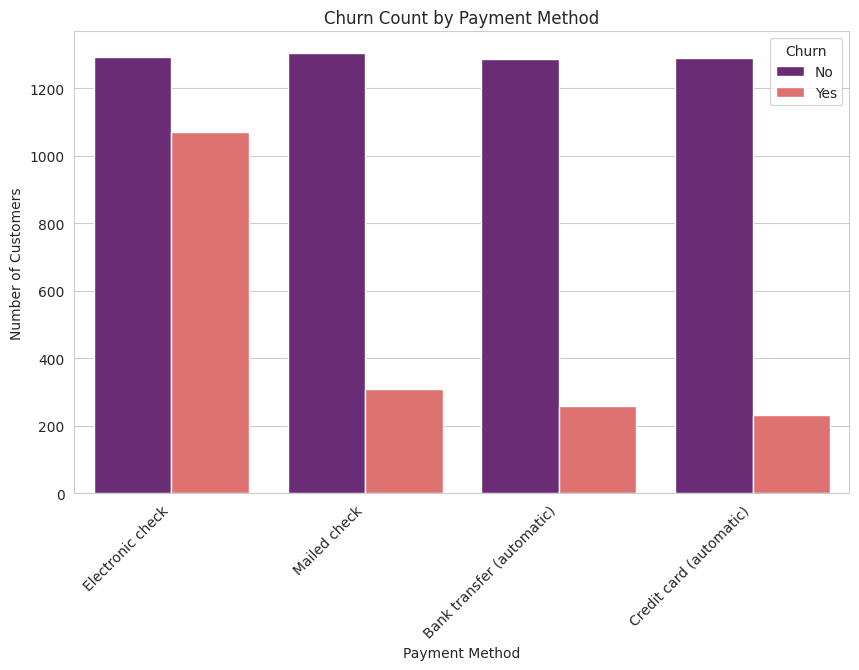

Insight: Electronic check payment method has a higher churn rate.


In [10]:
# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Adjust resolution for better display

# Overall Churn Rate
churn_counts = df['Churn'].value_counts()
churn_rate = churn_counts['Yes'] / len(df) * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%\n")

# Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()
print("Insight: Month-to-month contracts have significantly higher churn.")

# Churn by Tenure Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tenure_Group', hue='Churn', palette='plasma', order=labels) # Use defined order
plt.title('Churn Count by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()
print("Insight: Churn is high in early tenure groups, especially 0-6 months.")

# Churn by Internet Service Type
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='cividis')
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()
print("Insight: Fiber optic internet customers show higher churn compared to DSL.")

# Monthly Charges Distribution vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='muted')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()
print("Insight: Churned customers tend to have higher monthly charges on average.")

# Churn by Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='magma')
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()
print("Insight: Electronic check payment method has a higher churn rate.")

In [9]:
# 1. Create 'Tenure_Group'
bins = [0, 6, 12, 24, 48, 60, df['tenure'].max()]
labels = ['0-6 Months', '7-12 Months', '13-24 Months', '25-48 Months', '49-60 Months', '60+ Months']
df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
print("Tenure_Group created.")

# 2. Create 'MonthlyCharges_Category'
bins_charges = [0, 30, 60, 90, df['MonthlyCharges'].max()]
labels_charges = ['Low (<$30)', 'Medium ($30-$60)', 'High ($60-$90)', 'Very High (>$90)']
df['MonthlyCharges_Category'] = pd.cut(df['MonthlyCharges'], bins=bins_charges, labels=labels_charges, right=False)
print("MonthlyCharges_Category created.")

# 3. Create 'Has_MultipleServices'
df['Has_MultipleServices'] = df.apply(lambda row: 'Yes' if row['PhoneService'] == 'Yes' and row['InternetService'] != 'No' else 'No', axis=1)
print("Has_MultipleServices created.")

print("\nData after feature engineering:")
print(df.head())

Tenure_Group created.
MonthlyCharges_Category created.
Has_MultipleServices created.

Data after feature engineering:
   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... StreamingMovies  \
0            No             DSL             No  ...              No   
1            No             DSL            Yes  ...              No   
2            No             DSL            Yes  ...              No   
3            No             DSL            Yes  ...              No   
4            No     Fiber optic             No  ... 

In [6]:
# 1. Handle missing 'TotalCharges'
# Convert 'TotalCharges' to numeric, coerce errors will turn non-numeric into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill NaN values (which are now where blanks were) with 0 (for new customers)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print("Missing 'TotalCharges' handled.")

# 2. Standardize 'SeniorCitizen' (0/1 to No/Yes)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
print("SeniorCitizen standardized.")

# 3. Standardize 'No internet service' and 'No phone service' categories
# Replace 'No internet service' with 'No'
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_service_cols:
    df[col] = df[col].replace('No internet service', 'No')
print("Internet service columns standardized.")

# Replace 'No phone service' with 'No' for 'MultipleLines'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
print("MultipleLines standardized.")

print("customerID column is being retained for Looker Studio.")


print("\nData after initial cleaning:")
print(df.head())
print(df.info())

Missing 'TotalCharges' handled.
SeniorCitizen standardized.
Internet service columns standardized.
MultipleLines standardized.
customerID column is being retained for Looker Studio.

Data after initial cleaning:
   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No          

In [5]:
# --- UPLOAD RAW CSV TO COLAB SESSION ---
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    # Read the CSV into a pandas DataFrame
    df = pd.read_csv(StringIO(uploaded[fn].decode('utf-8')))

print("Data loaded successfully!")
print(df.head())
print(df.info())

# Print all column names to check for typos/spaces ---
print("\nColumns in DataFrame:", df.columns.tolist())

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
User uploaded file "WA_Fn-UseC_-Telco-Customer-Churn.csv" with length 977501 bytes
Data loaded successfully!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service   

In [2]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from io import StringIO # To read string as file for direct CSV processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
